Load the `tidyverse` and the 🐧`palmerpenguins`🐧 packages.

In [1]:
library('tidyverse')
library('palmerpenguins')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


We want to make a jitter chart of normalized penguin length measurements (e.g. `bill_depth_mm`). 

Like this:

![](https://github.com/chuckpr/BIOS512/blob/main/in-class-exercises/12/12_00_pivot_chart.png?raw=true)

...but our data is not in the right "shape."

Use `pivot_longer` to re-shape the data to create the chart above 👆. 

Then, calculate a normalized value for each measurement by dividing *individual measurement values* by the *maximum value* within the measurement type (e.g. `bill_depth_mm` is a "measurement type") and capture this new value in a new column with `mutate`.

In [2]:
penguins |> head()

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


In [10]:
penguins_long = penguins |>
    pivot_longer(cols = c(bill_length_mm, bill_depth_mm, flipper_length_mm)) |>
    group_by(name) |>
    mutate(norm_value = value / max(value, na.rm = TRUE))

penguins_long |> head()

species,island,body_mass_g,sex,year,name,value,norm_value
<fct>,<fct>,<int>,<fct>,<int>,<chr>,<dbl>,<dbl>
Adelie,Torgersen,3750,male,2007,bill_length_mm,39.1,0.6560403
Adelie,Torgersen,3750,male,2007,bill_depth_mm,18.7,0.8697674
Adelie,Torgersen,3750,male,2007,flipper_length_mm,181.0,0.7835498
Adelie,Torgersen,3800,female,2007,bill_length_mm,39.5,0.6627517
Adelie,Torgersen,3800,female,2007,bill_depth_mm,17.4,0.8093023
Adelie,Torgersen,3800,female,2007,flipper_length_mm,186.0,0.8051948


Now make the chart.

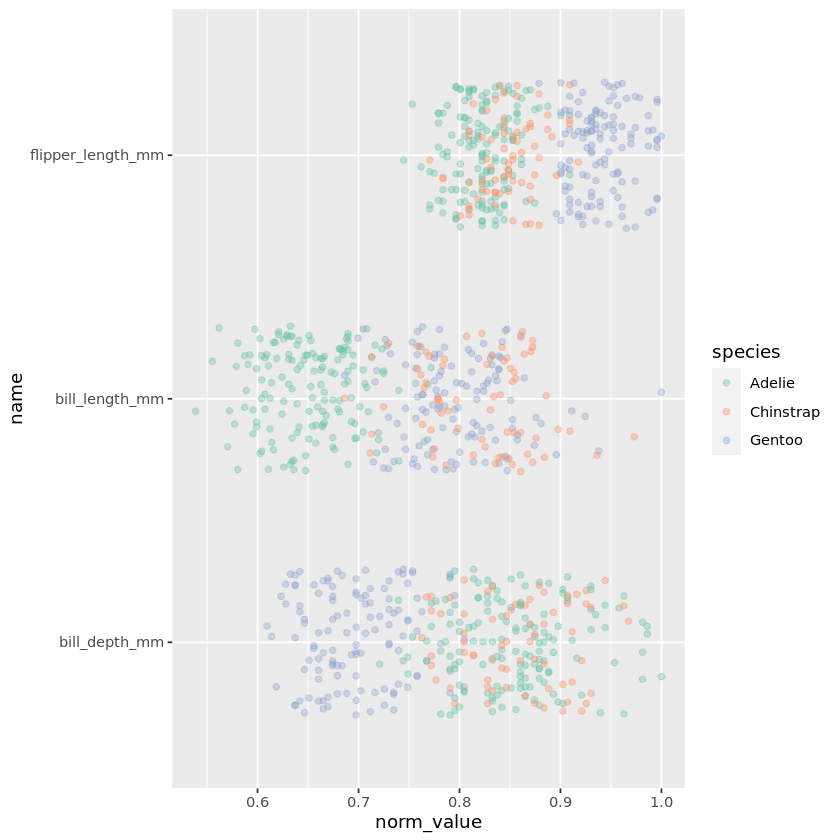

In [12]:
p = ggplot(penguins_long, aes(x = norm_value, y = name, color = species)) +
    geom_point(position = position_jitter(height = 0.3, width = 0),
               na.rm = T, alpha = 0.35) +
    scale_color_brewer(palette = 'Set2')

p